In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file 

## Load dataset

In [2]:
N_FEATURES = 123

X_train, y_train = load_svmlight_file('dataset/a9a', n_features=N_FEATURES)
X_val, y_val = load_svmlight_file('dataset/a9a.t', n_features=N_FEATURES)

y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)

## Hyper-parameters

In [3]:
EPOCH_NUM = 300
BATCH_SIZE = 32
LR = 1e-5
PENALTY_FACTOR = 0.4

## Log-likehood Loss function

$ J(w) = -\frac{1}{n}[\sum_{i=1}^{n}y_i \log g(h_w(x_i)) + (1-y_i)\log(1-g(h_w(x_i)))]$

$ \nabla_w J(w) = -y\cdot\frac{1}{h_w(x)}\cdot\frac{\partial h_w(x)}{\partial w}+(1-y)\cdot\frac{1}{1-h_w(x)}\cdot\frac{\partial h_w(x)}{\partial w}$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(y_, y):
    return -1/y.shape[0] * (y*np.log(sigmoid(y_)) + (1-y)*np.log(1-sigmoid(y_))).sum()

## Initialize parameter $w$ with normal distribution

In [5]:
w = np.random.normal(1, 1, size=(N_FEATURES, 1))

## Train

In [6]:
batch_idxs_pool = np.arange(X_train.shape[0])

losses_train, losses_val = [], []
accs_train, accs_val = [], []

for epoch in range(EPOCH_NUM):
    for step in range(X_train.shape[0] // BATCH_SIZE):
        batch_idx = np.random.choice(batch_idxs_pool, size=BATCH_SIZE)
        X, y = X_train[batch_idx], y_train[batch_idx]
        
        grad = X.T.dot(sigmoid(X.dot(w))-y) # + PENALTY_FACTOR*w
        grad = -grad
        
        w += LR * grad
    
    output_train, output_val = X_train.dot(w), X_val.dot(w)
    
    losses_train.append(loss(output_train, y_train))
    losses_val.append(loss(output_val, y_val))
    
    output_train[sigmoid(output_train) > 0.5] = 1
    output_train[sigmoid(output_train) <= 0.5] = -1
    
    output_val[sigmoid(output_val) > 0.5] = 1
    output_val[sigmoid(output_val) <= 0.5] = -1
    
    accs_train.append(np.count_nonzero(output_train == y_train)/X_train.shape[0])
    accs_val.append(np.count_nonzero(output_val == y_val)/X_val.shape[0])
    
    print('Epoch: #{}\tLoss_train: {:.4f}\tLoss_val: {:.4f}\tAcc_train: {:.4f}\tAcc_val: {:.4f}'.format(
        epoch+1, losses_train[-1], losses_val[-1], accs_train[-1], accs_val[-1])
    )
        

Epoch: #1	Loss_train: 7.5257	Loss_val: 7.5994	Acc_train: 0.2409	Acc_val: 0.2362
Epoch: #2	Loss_train: 6.3684	Loss_val: 6.4354	Acc_train: 0.2411	Acc_val: 0.2365
Epoch: #3	Loss_train: 5.2445	Loss_val: 5.3045	Acc_train: 0.2428	Acc_val: 0.2392
Epoch: #4	Loss_train: 4.1859	Loss_val: 4.2374	Acc_train: 0.2570	Acc_val: 0.2504
Epoch: #5	Loss_train: 3.2867	Loss_val: 3.3278	Acc_train: 0.2850	Acc_val: 0.2785
Epoch: #6	Loss_train: 2.5876	Loss_val: 2.6182	Acc_train: 0.3239	Acc_val: 0.3163
Epoch: #7	Loss_train: 2.0900	Loss_val: 2.1116	Acc_train: 0.3712	Acc_val: 0.3671
Epoch: #8	Loss_train: 1.7501	Loss_val: 1.7643	Acc_train: 0.4260	Acc_val: 0.4166
Epoch: #9	Loss_train: 1.5233	Loss_val: 1.5316	Acc_train: 0.4718	Acc_val: 0.4653
Epoch: #10	Loss_train: 1.3655	Loss_val: 1.3692	Acc_train: 0.5114	Acc_val: 0.5043
Epoch: #11	Loss_train: 1.2563	Loss_val: 1.2564	Acc_train: 0.5459	Acc_val: 0.5397
Epoch: #12	Loss_train: 1.1765	Loss_val: 1.1740	Acc_train: 0.5724	Acc_val: 0.5694
Epoch: #13	Loss_train: 1.1187	Loss_va

Epoch: #103	Loss_train: 0.5200	Loss_val: 0.5131	Acc_train: 0.7874	Acc_val: 0.7898
Epoch: #104	Loss_train: 0.5187	Loss_val: 0.5118	Acc_train: 0.7880	Acc_val: 0.7901
Epoch: #105	Loss_train: 0.5175	Loss_val: 0.5106	Acc_train: 0.7883	Acc_val: 0.7904
Epoch: #106	Loss_train: 0.5163	Loss_val: 0.5095	Acc_train: 0.7887	Acc_val: 0.7903
Epoch: #107	Loss_train: 0.5151	Loss_val: 0.5083	Acc_train: 0.7892	Acc_val: 0.7909
Epoch: #108	Loss_train: 0.5139	Loss_val: 0.5071	Acc_train: 0.7895	Acc_val: 0.7917
Epoch: #109	Loss_train: 0.5128	Loss_val: 0.5061	Acc_train: 0.7898	Acc_val: 0.7922
Epoch: #110	Loss_train: 0.5117	Loss_val: 0.5049	Acc_train: 0.7901	Acc_val: 0.7925
Epoch: #111	Loss_train: 0.5105	Loss_val: 0.5038	Acc_train: 0.7905	Acc_val: 0.7932
Epoch: #112	Loss_train: 0.5094	Loss_val: 0.5027	Acc_train: 0.7906	Acc_val: 0.7934
Epoch: #113	Loss_train: 0.5083	Loss_val: 0.5016	Acc_train: 0.7908	Acc_val: 0.7938
Epoch: #114	Loss_train: 0.5072	Loss_val: 0.5005	Acc_train: 0.7912	Acc_val: 0.7941
Epoch: #115	Loss

Epoch: #203	Loss_train: 0.4404	Loss_val: 0.4357	Acc_train: 0.8119	Acc_val: 0.8121
Epoch: #204	Loss_train: 0.4399	Loss_val: 0.4351	Acc_train: 0.8121	Acc_val: 0.8124
Epoch: #205	Loss_train: 0.4393	Loss_val: 0.4346	Acc_train: 0.8124	Acc_val: 0.8126
Epoch: #206	Loss_train: 0.4388	Loss_val: 0.4341	Acc_train: 0.8125	Acc_val: 0.8128
Epoch: #207	Loss_train: 0.4383	Loss_val: 0.4335	Acc_train: 0.8128	Acc_val: 0.8130
Epoch: #208	Loss_train: 0.4378	Loss_val: 0.4330	Acc_train: 0.8134	Acc_val: 0.8129
Epoch: #209	Loss_train: 0.4372	Loss_val: 0.4325	Acc_train: 0.8134	Acc_val: 0.8132
Epoch: #210	Loss_train: 0.4367	Loss_val: 0.4320	Acc_train: 0.8134	Acc_val: 0.8132
Epoch: #211	Loss_train: 0.4362	Loss_val: 0.4315	Acc_train: 0.8137	Acc_val: 0.8134
Epoch: #212	Loss_train: 0.4357	Loss_val: 0.4310	Acc_train: 0.8141	Acc_val: 0.8133
Epoch: #213	Loss_train: 0.4352	Loss_val: 0.4306	Acc_train: 0.8136	Acc_val: 0.8135
Epoch: #214	Loss_train: 0.4347	Loss_val: 0.4301	Acc_train: 0.8140	Acc_val: 0.8137
Epoch: #215	Loss

## Visualization

### Losses

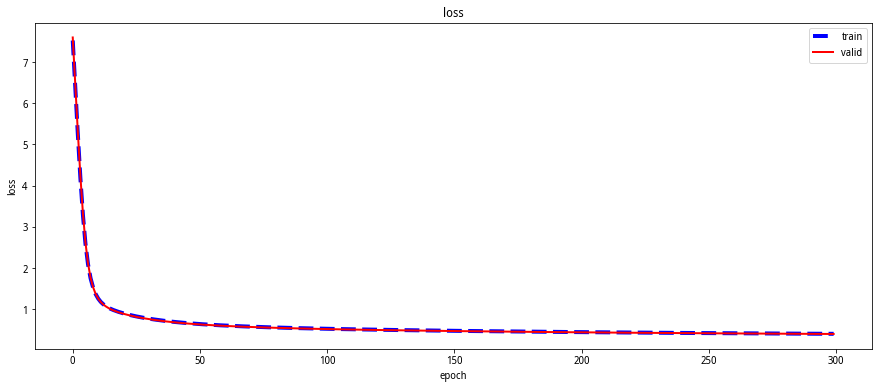

In [7]:
plt.figure(figsize=[15,6])
plt.title('loss')
plt.plot(losses_train, '--', c='b',linewidth=4, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('logistics-regression-losses.png')
plt.show()

### Accuracy

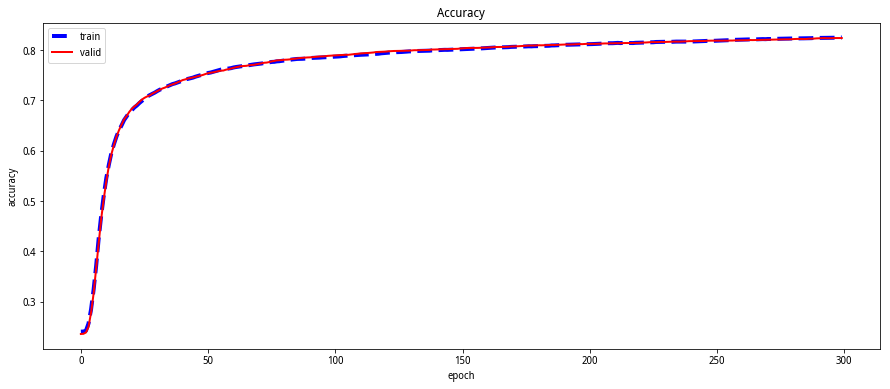

In [8]:
plt.figure(figsize=[15,6])
plt.title('Accuracy')
plt.plot(accs_train, '--', c='b',linewidth=4, label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accs_val, c='r', linewidth=2, label='valid')
plt.legend()
plt.savefig('logistics-regression-accuracy.png')
plt.show()